## **Perkenalan Dataset**


##### Variabel-variabel pada Diabetes prediction dataset adalah sebagai berikut:
- **`gender`** :Jenis kelamin yang merujuk pada perbedaan biologis antara laki-laki dan perempuan, yang dapat memengaruhi risiko seseorang terhadap diabetes. Terdapat tiga kategori pada variabel ini: laki-laki, perempuan, dan lainnya.
- **`age`** : Usia merupakan faktor yang sangat penting karena diabetes lebih sering didiagnosis pada individu yang lebih tua. Dalam dataset ini, rentang usia yang tercatat adalah antara 0 hingga 80 tahun.
- **`hypertension`** : Hipertensi adalah kondisi medis di mana tekanan darah tinggi dapat meningkatkan risiko penyakit, termasuk diabetes. Nilainya adalah 0 atau 1, di mana 0 berarti tidak memiliki hipertensi dan 1 berarti menderita hipertensi.
- **`heart_disease`** : Penyakit jantung merupakan faktor risiko lain yang berkontribusi pada peningkatan kemungkinan seseorang mengidap diabetes. Nilai pada variabel ini adalah 0 atau 1, dengan 0 menunjukkan tidak ada penyakit jantung dan 1 berarti pasien memiliki penyakit jantung.
- **`smoking_history`** : Riwayat merokok berperan sebagai faktor tambahan dalam peningkatan risiko diabetes, serta memperburuk dampak komplikasi. Terdapat 5 kategori yang tersedia dalam data: tidak merokok saat ini, merokok sebelumnya, tidak ada informasi, merokok saat ini, dan merokok pernah.
- **`bmi`** : Indeks Massa Tubuh (BMI) mengukur komposisi tubuh berdasarkan berat dan tinggi badan. BMI yang tinggi sering dikaitkan dengan peningkatan risiko diabetes. Rentang BMI dalam dataset ini adalah dari 10,16 hingga 71,55. Kategori BMI adalah: kurang dari 18,5 (kekurangan berat badan), 18,5 hingga 24,9 (normal), 25 hingga 29,9 (kelebihan berat badan), dan 30 atau lebih (obesitas).
- **`HbA1c_level`** : Kadar HbA1c (Hemoglobin A1c) mengukur rata-rata kadar gula darah dalam dua hingga tiga bulan terakhir. Kadar HbA1c yang lebih tinggi menunjukkan risiko lebih besar untuk diabetes. Biasanya, kadar lebih dari 6,5% menandakan adanya diabetes.
- **`blood_glucose_level`** : Kadar glukosa darah mengacu pada jumlah glukosa yang ada dalam darah pada suatu waktu tertentu. Kadar glukosa darah yang tinggi merupakan indikator utama diabetes.
- **`diabetes`** : Variabel target yang akan diprediksi, dengan nilai 1 menunjukkan pasien mengidap diabetes dan 0 berarti tidak mengidap diabetes.

## **1. Import Library**

Mengimport library-library yang dibutuhkan untuk membuat model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 


## **2. Data Loading**

Load dataset dan melihat 5 dataset teratas

In [2]:
data = pd.read_csv(r'C:\KULIAH STATISTIKA UNIVERSITAS SYIAH KUALA\SEMESTER 6\Coding Camp by DBS\Submission Project Akhir Kelas\Machine Learning Terapan\Submission\Dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## **3. Eksplorasi Data**

### 3.1. Deskripsi Variabel

Malihat struktur dataset dan indikasi adanya missing value.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Insight**
- Tidak ada indikasi missing value

Analisis statistik deskriptif pada variabel

In [4]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### 3.2. Menangani Missing Value dan Outlier

Melihat apakah terdapat missing values pada dataset

In [5]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**Insight**
- Tidak ada missing value

Melihat total kategori pada fitur gender

In [6]:
print(data['gender'].value_counts())

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


**Insight**
- Terdapat kategori yang hanya ada 18 dari total keseluruhan data dan sangat timpang jumlah data keseluruhan.

Mangganti kategori yang jumlahnya sangat kecil dengan modus dari kategori lain.

In [7]:
gender = data['gender'].mode()[0]
data['gender'] = data['gender'].replace('Other', gender)

Mengecek dan menangani Outlier

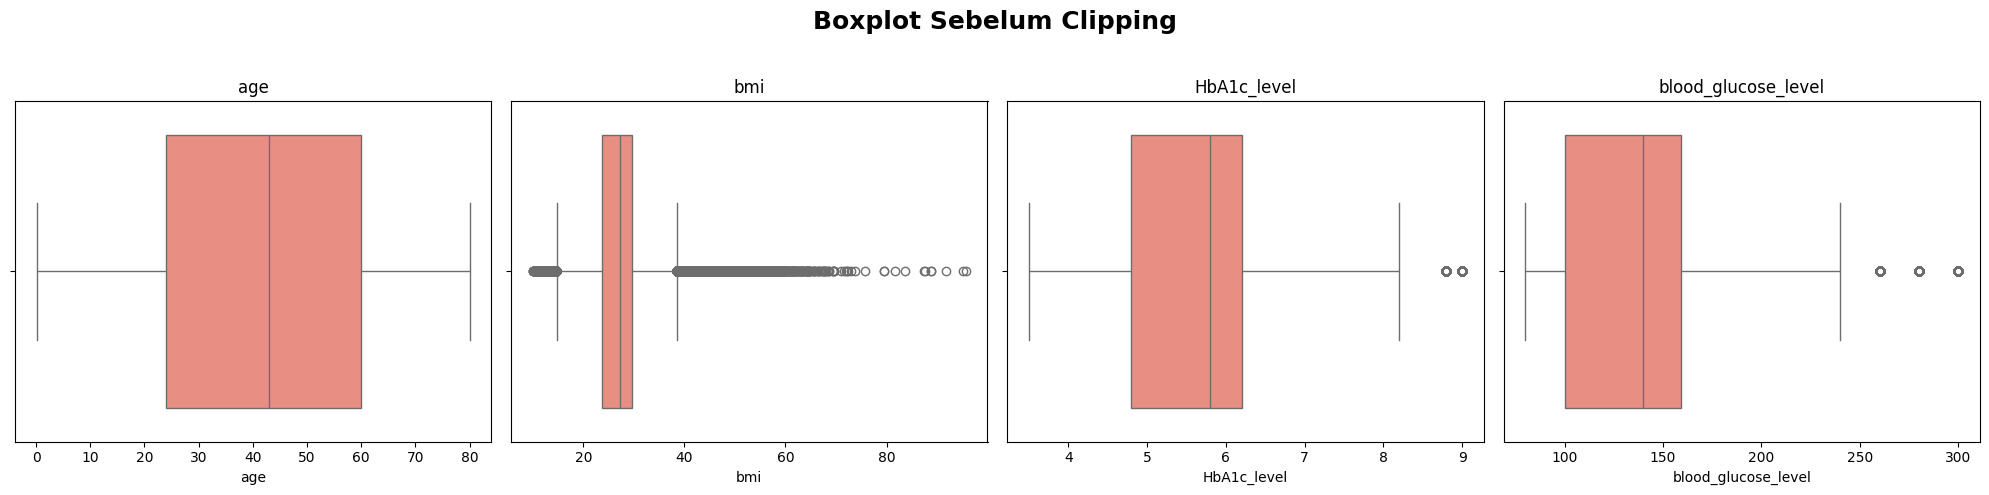

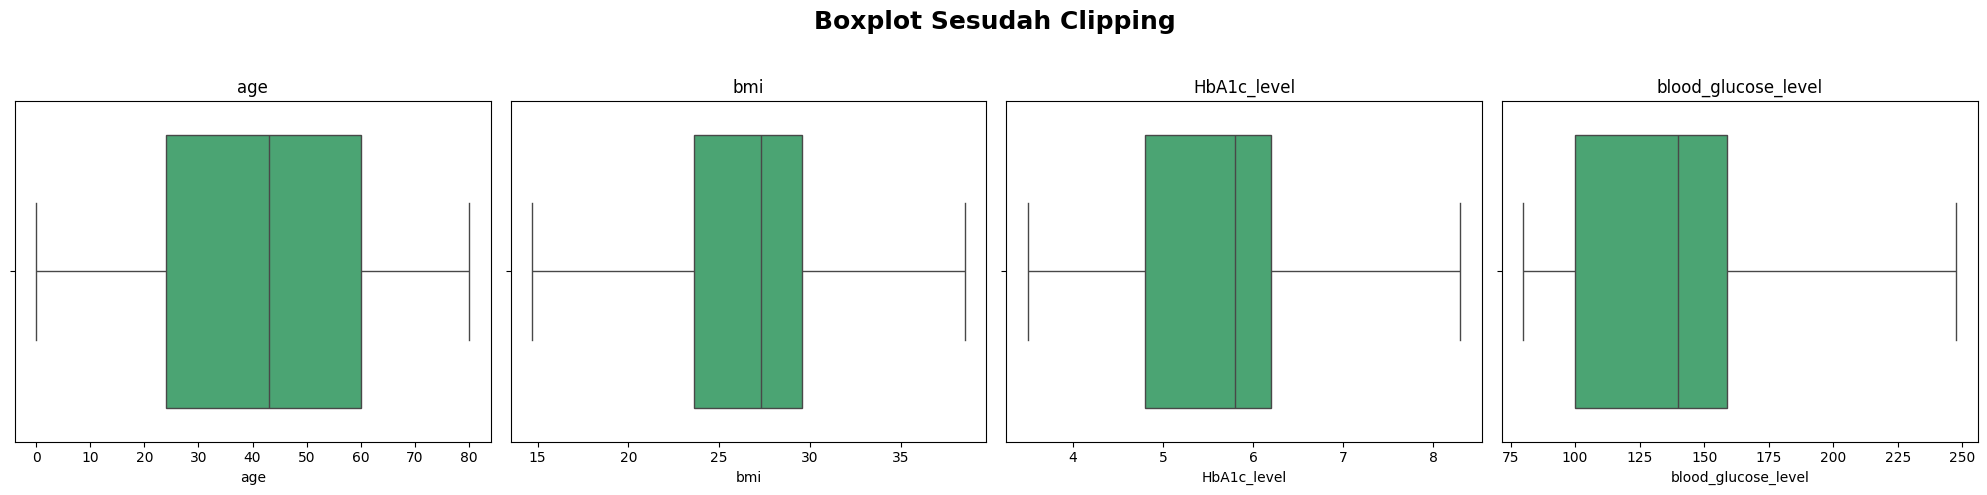

In [8]:
numeric = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
outlierValues = {}
data_before_clipping = data[numeric].copy()

# Deteksi dan Clipping Outlier
for col in numeric:
    q1, q3 = np.percentile(data[col].dropna(), [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    outliers = data[col][(data[col] < lower) | (data[col] > upper)]
    outlierValues[col] = outliers

    data[col] = np.clip(data[col], lower, upper)

# Visualisasi Boxplot SEBELUM Clipping
fig, axes = plt.subplots(1, len(numeric), figsize=(5 * len(numeric), 5))
fig.suptitle("Boxplot Sebelum Clipping", fontsize=18, fontweight='bold')
for ax, col in zip(axes, numeric):
    sns.boxplot(x=data_before_clipping[col], ax=ax, color='salmon')
    ax.set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

# Visualisasi Boxplot SESUDAH Clipping
fig, axes = plt.subplots(1, len(numeric), figsize=(5 * len(numeric), 5))
fig.suptitle("Boxplot Sesudah Clipping", fontsize=18, fontweight='bold')
for ax, col in zip(axes, numeric):
    sns.boxplot(x=data[col], ax=ax, color='mediumseagreen')
    ax.set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 3.3. Univariate Analysis

Mengelompokan kolom ke numerik dan kategorikal.

In [9]:
numeric = ['age','bmi','HbA1c_level','blood_glucose_level']
categoric = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

Visualisasi distibusi nilai kolom numerik.

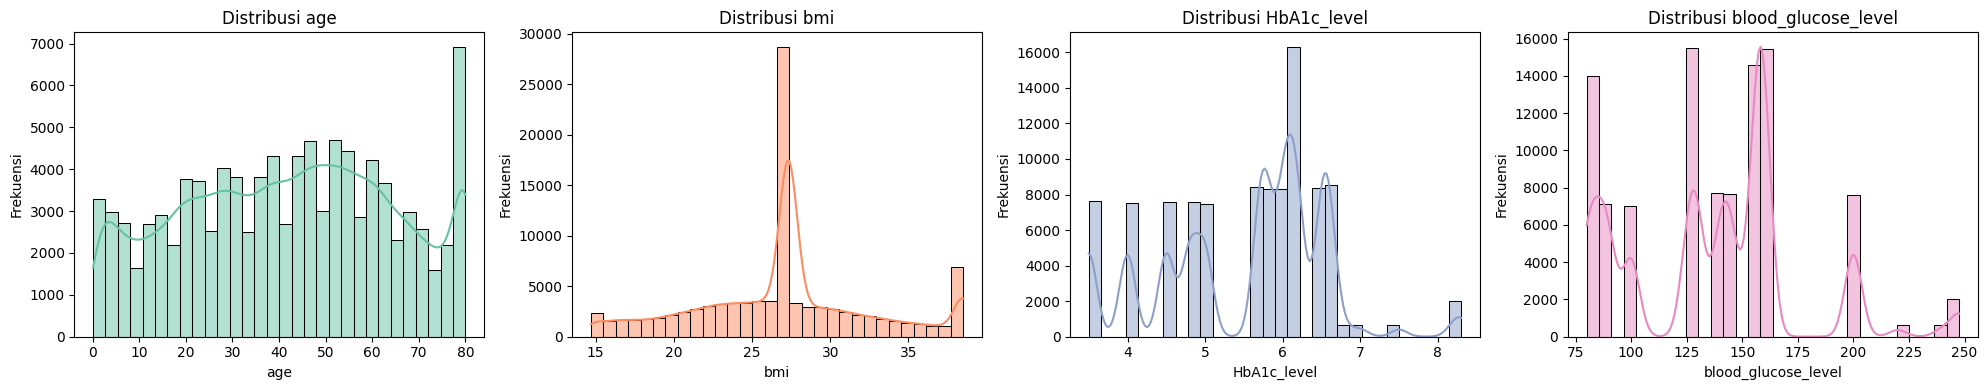

In [10]:
plt.figure(figsize=(5 * len(numeric), 4))

colors = sns.color_palette("Set2", len(numeric))

for i, col in enumerate(numeric):
    plt.subplot(1, len(numeric), i + 1)
    
    if data[col].nunique() > 10:
        sns.histplot(data[col].dropna(), bins=30, kde=True, color=colors[i])
    else:
        sns.countplot(x=data[col], color=colors[i])

    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

Visualisasi distibusi nilai kolom Kategori.

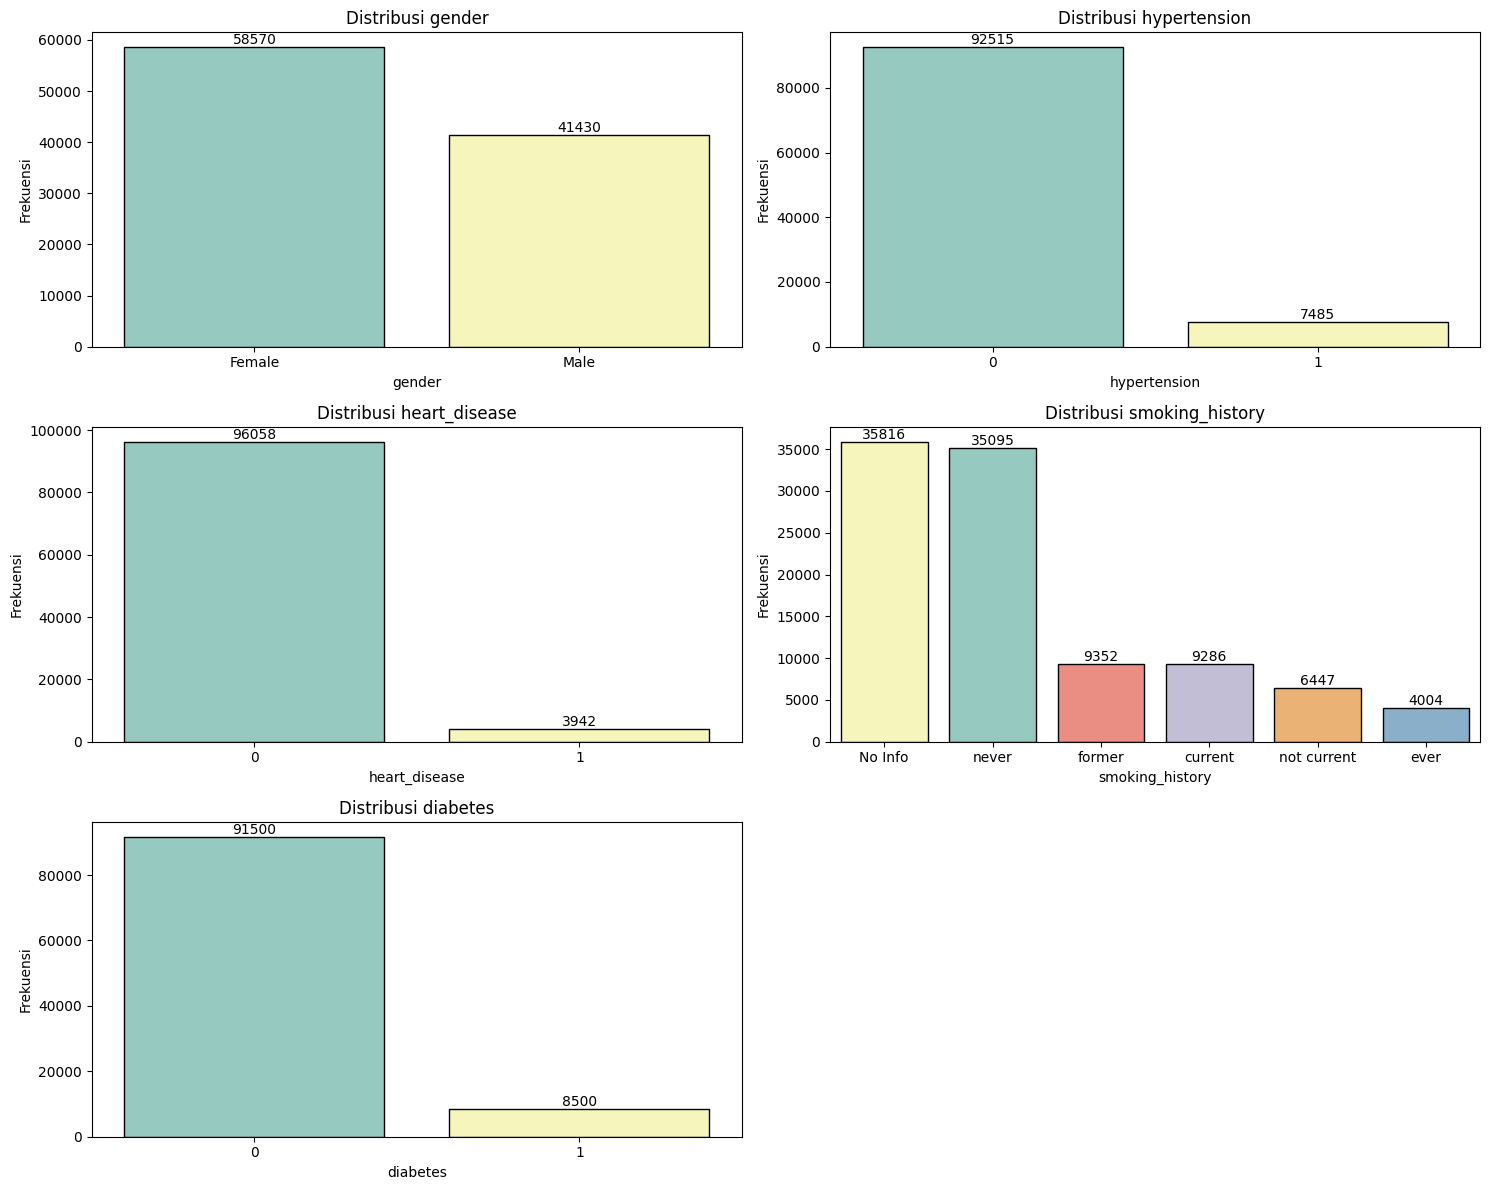

In [11]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(categoric[:6], 1):  # Ambil maksimal 6 kolom pertama
    plt.subplot(3, 2, i)
    unique_vals = data[col].nunique()
    palette = sns.color_palette("Set3", unique_vals)
    
    ax = sns.countplot(
        x=data[col],
        hue=data[col],
        order=data[col].value_counts().index,
        palette=palette,
        legend=False,
        edgecolor="black"
    )
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.title(f"Distribusi {col}")
    plt.ylabel("Frekuensi")
    plt.xlabel(col)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### 3.4. Multivariate Analysis

Melihat rata rata diabetes dibandingkan fitur lain dalam dataset

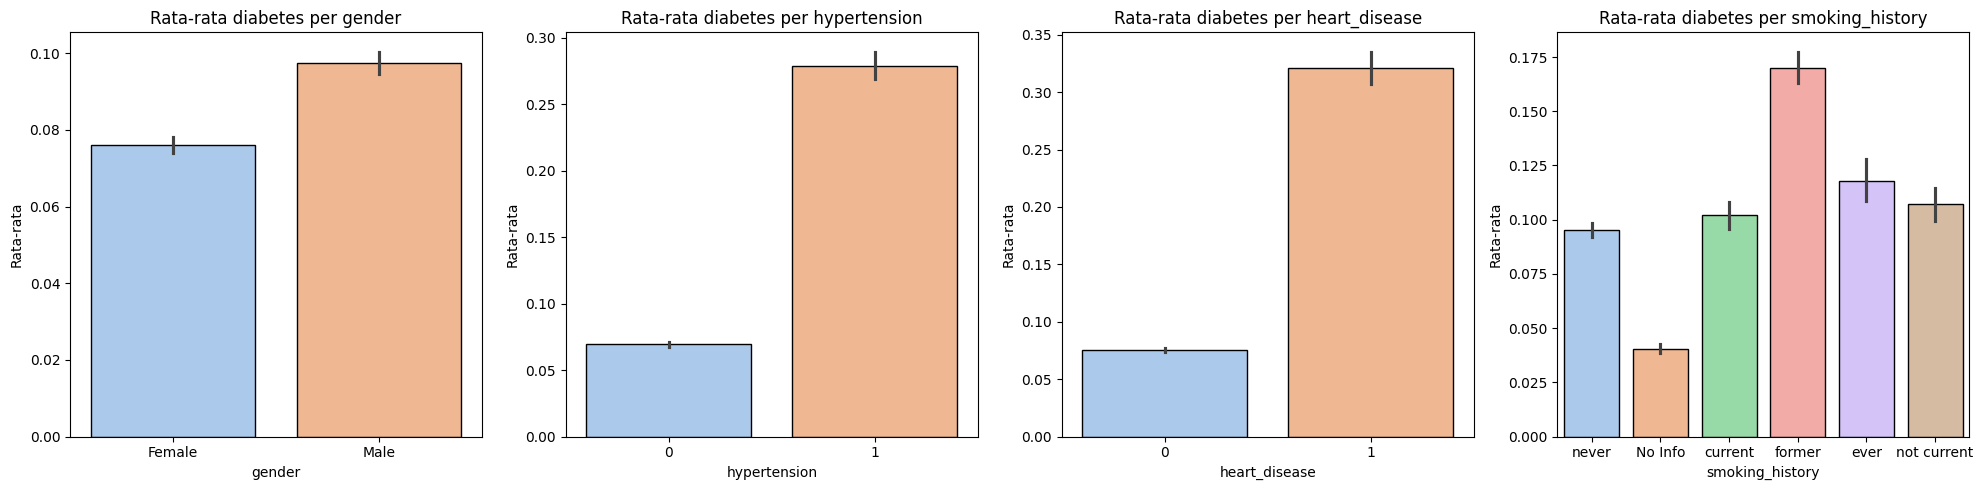

In [12]:
categoric = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

fig, axes = plt.subplots(1, len(categoric), figsize=(20, 5))

for i, col in enumerate(categoric):
    sns.barplot(
        x=col,
        y="diabetes",
        data=data,
        hue=col,
        palette="pastel",
        estimator=np.mean,
        legend=False,
        edgecolor="black",
        ax=axes[i]
    )
    axes[i].set_title(f"Rata-rata diabetes per {col}")
    axes[i].set_ylabel("Rata-rata")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


Visualisasikan hubungan antar variabel

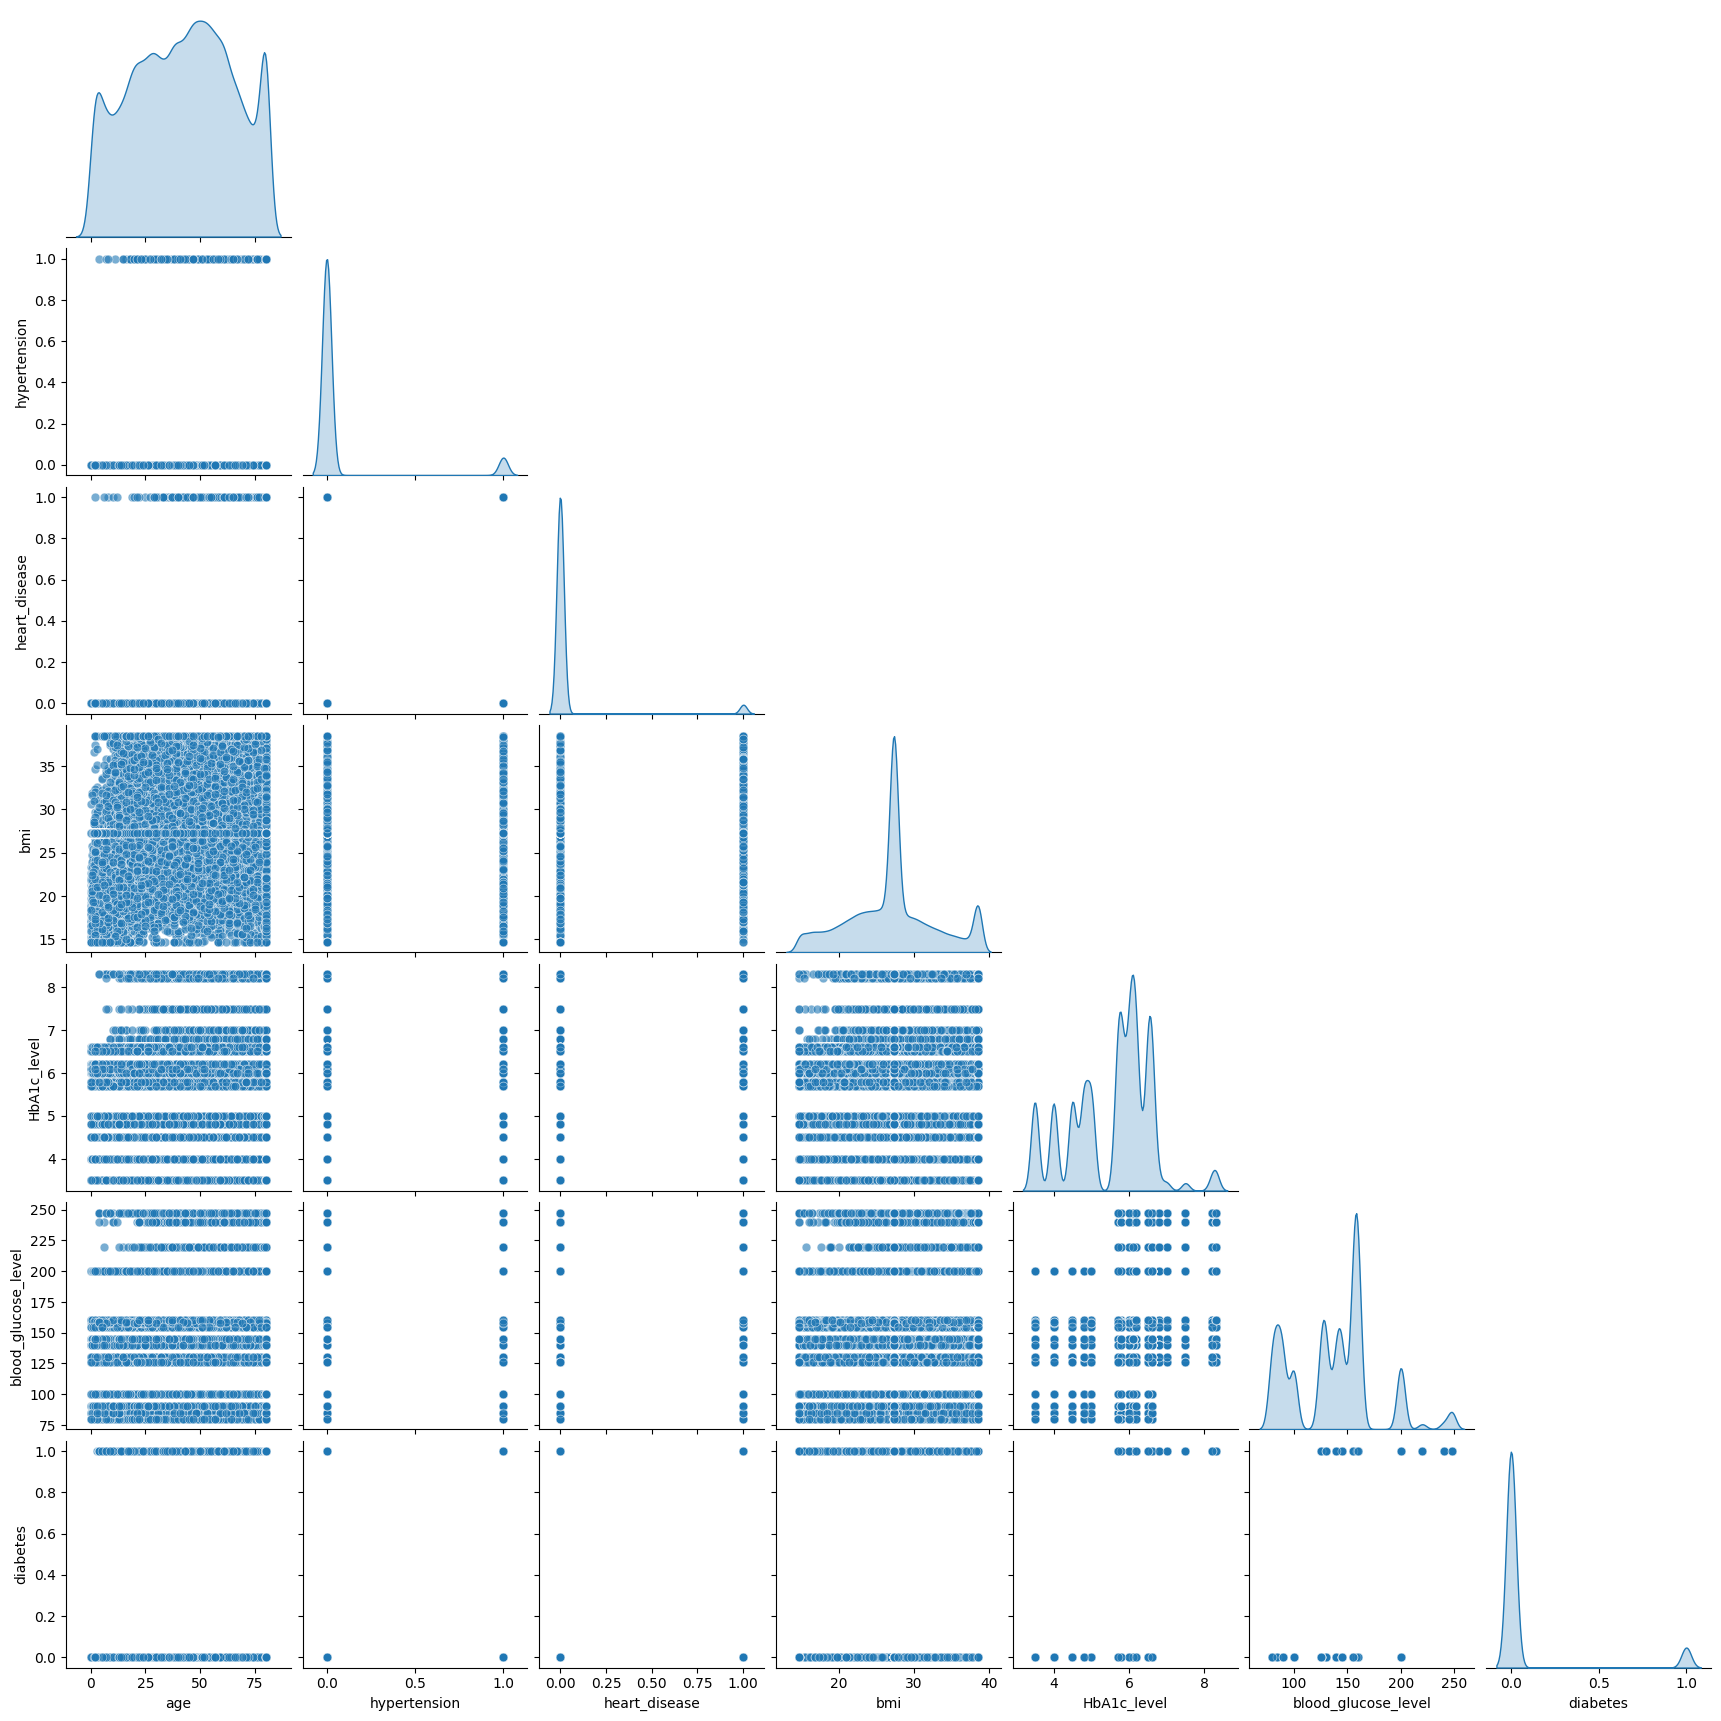

In [13]:
sns.pairplot(data, diag_kind='kde', kind='scatter', plot_kws={'alpha':0.6, 's':40}, corner=True)
plt.show()

Visualisasi correlation matrix

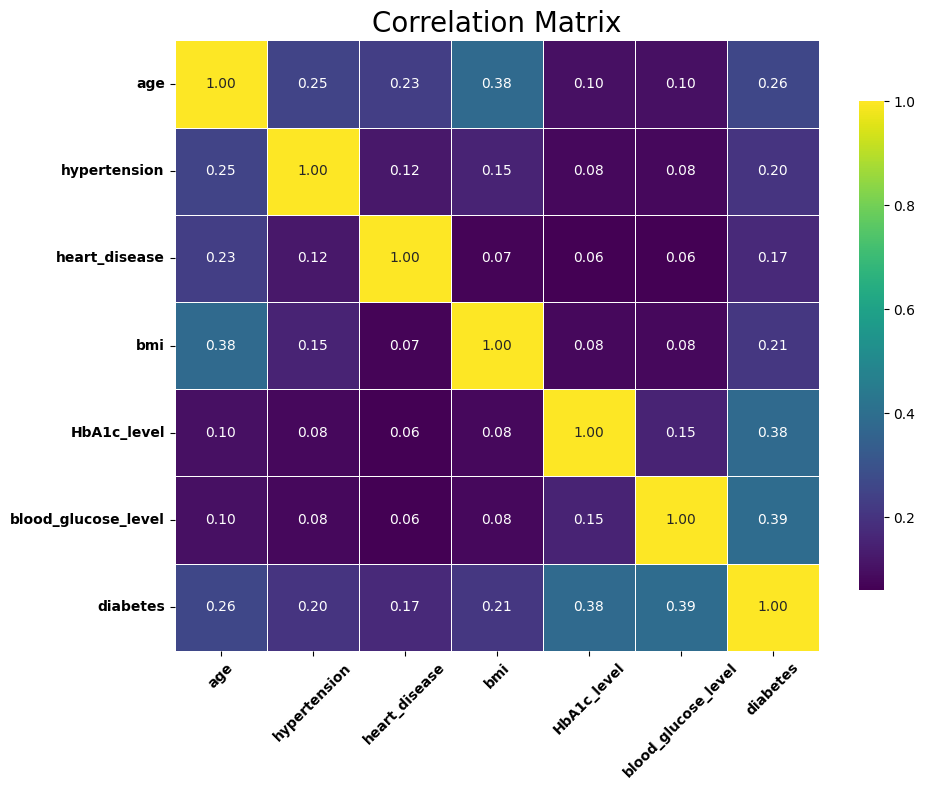

In [14]:
numeric = data.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric].corr().round(2)

sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='viridis',
    linewidths=0.5, 
    fmt='.2f', 
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix", fontsize=20)
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(rotation=0, fontweight='bold')
plt.tight_layout()
plt.show()


## **4. Data Preparation**

### 4.1. Encoding Fitur Kategori

Encoding Variabel gender dan smoking_history menggunakan OneHotEncoder serta cek hasil dari encoding.

In [15]:
categoric = ['gender', 'smoking_history']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_data = pd.DataFrame(
    encoder.fit_transform(data[categoric]),
    columns=encoder.get_feature_names_out(categoric),
    index=data.index
)

data = data.drop(columns=categoric).join(encoded_data)
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,27.32,6.6,80.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### 4.2. Standarisasi Fitur

Melakukan standarisasi menggunakan StandardScaler untuk menyamakan rentang nilai dan melihat hasil perubahan

In [16]:
numeric = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']
scaler = StandardScaler()
data[numeric] = scaler.fit_transform(data[numeric])
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.692704,0,1,-0.317679,1.031178,0.067835,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.538006,0,0,0.057889,1.031178,-1.490353,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.616691,0,0,0.057889,0.172162,0.535292,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.261399,0,0,-0.624482,-0.495962,0.457382,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.515058,1,1,-1.208112,-0.686854,0.457382,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### 4.3. Spliting Data

Membagi data menjadi train dan test dengan komposisi 20 % untuk test dan 80% untuk train

In [17]:
X = data.drop(columns=["diabetes"])  
y = data["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (80000, 14)
y_train shape: (80000,)
X_test shape: (20000, 14)
y_test shape: (20000,)


## **5. Model Development**

### 5.1. Random Forest

Load model Random Forest

In [18]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 5.2. Naive Bayes

Load model Naive Bayes

In [19]:
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)

BernoulliNB()

### 5.3 Decision Tree

Load model Decision Tree

In [20]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## **6. Evaluasi Model**

### 6.1. Random Forest

Evaluasi model Random Forest.

Akurasi: 0.9696

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



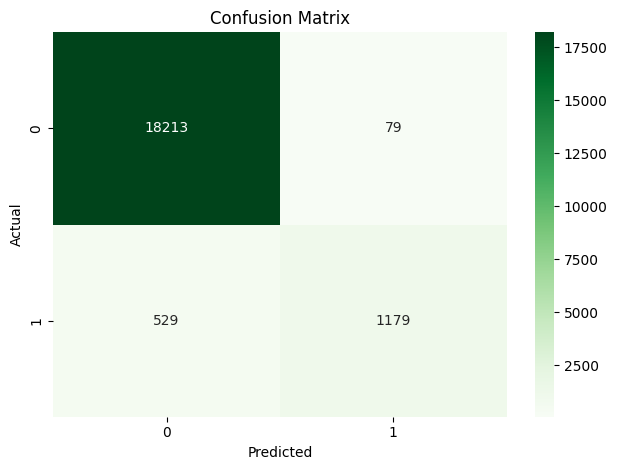

In [22]:
y_pred_rf = random_forest.predict(X_test)

print(f"Akurasi: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### 6.2. Naive Bayes

Evaluasi model Naive Bayes.

Akurasi: 0.9163

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     18292
           1       0.52      0.31      0.39      1708

    accuracy                           0.92     20000
   macro avg       0.73      0.64      0.67     20000
weighted avg       0.90      0.92      0.91     20000



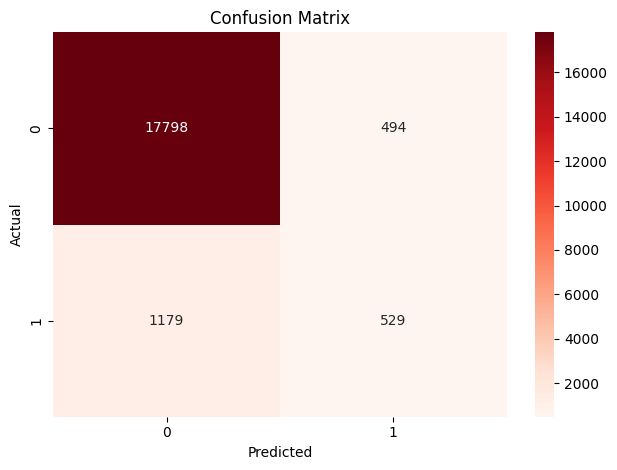

In [23]:
y_pred_nb = naive_bayes.predict(X_test)

print(f"Akurasi: {accuracy_score(y_test, y_pred_nb):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### 6.3. Decision Tree

Evaluasi model Decision Tree.

Akurasi: 0.9525

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18292
           1       0.72      0.73      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



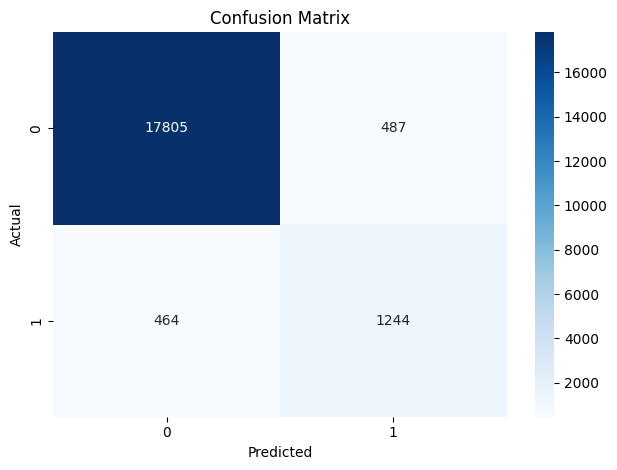

In [24]:
y_pred_dt = decision_tree.predict(X_test)

print(f"Akurasi: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()